# Metropolis Monte Carlo


## Direct Monte-Carlo Estimation

In MC estimation, we approximate an integral by the sample mean of a function of simulated random variables. In more mathematical terms,

$$\int p(x)\ f(x)\ dx = \mathbb{E}_{p(x)} \big[\ f(x) \big] \approx \frac{1}{N} \sum_{n=1}^{N}f(x_n)$$

where $x_n \sim \ p(x)$.



## Importance sampling 

With importance sampling, we try to reduce the variance of our Monte-Carlo integral estimation by choosing a better distribution from which to simulate our random variables. It involves multiplying the integrand to yield an expectation of a quantity that varies less than the original integrand over the region of integration. Concretely,

$$\mathbb{E}_{p(x)} \big[\ f(x) \big] = \int f(x)\ p(x)\ dx = \int f(x)\ p(x)\ \frac{q(x)}{q(x)}\ dx = \int \frac{p(x)}{q(x)}\cdot f(x)\ q(x)\ dx = \mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big]$$

Thus, the MC estimation of the expectation becomes:

$$\mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big] \approx \frac{1}{N} \sum_{n=1}^{N} w_n \cdot f(x_n)$$

where $w_n = \dfrac{p(x_n)}{q(x_n)}$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
from scipy import integrate

y, err = integrate.quad(np.exp, 0, 1)
y

1.7182818284590453

In [3]:
for n in 10**np.array([1,2,3,4,5,6,7,8]):
    x = np.random.uniform(0, 1, n)
    sol = np.mean(np.exp(x))
    print('%10d %.6f' % (n, sol))

        10 1.642354
       100 1.807853
      1000 1.731581
     10000 1.722432
    100000 1.718291
   1000000 1.718569
  10000000 1.718399
 100000000 1.718249


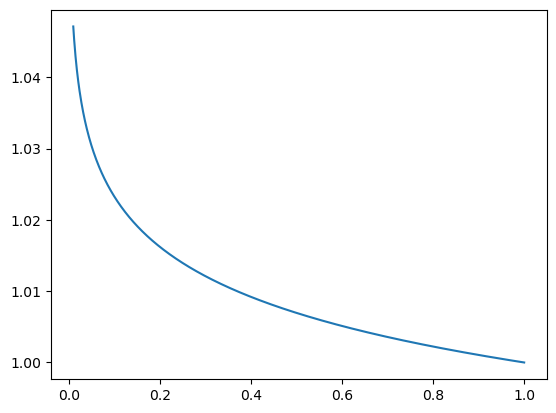

In [27]:
a = 0.01

def f(x):
    return x**(-a)

x = np.linspace(1e-2, 1, 1000)

plt.figure()
plt.plot(x, f(x))
plt.show()

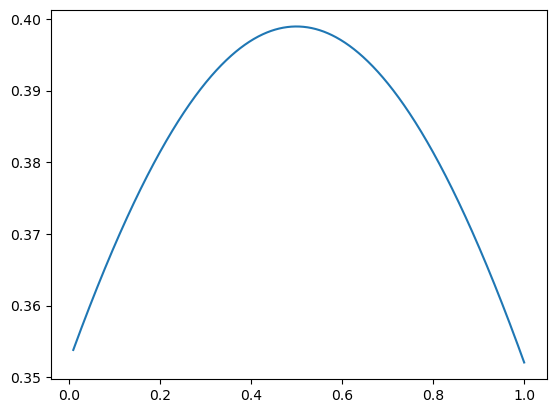

In [36]:
plt.plot(x, stats.norm(loc=0.5,scale=1).pdf(x),
        label=r'$g_2(x)$')

plt.show()

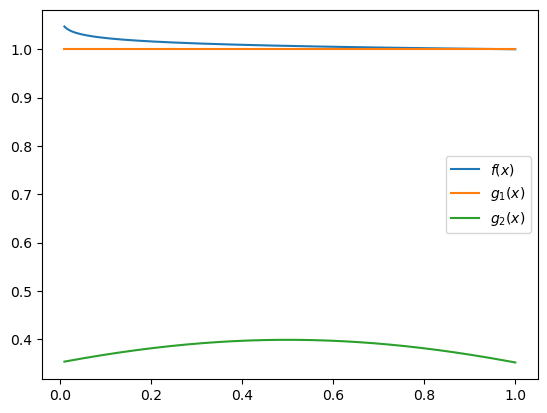

In [33]:
from scipy import stats
plt.figure()
plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, stats.uniform(0, 1).pdf(x),
        label=r'$g_1(x)$')
plt.plot(x, stats.norm(loc=0.5).pdf(x),
        label=r'$g_2(x)$')
plt.legend(loc='best')
plt.show()

We try two different distribution for sampling, the uniform and the normal distribution. The uniform corresponds to the 
original MC calculation.

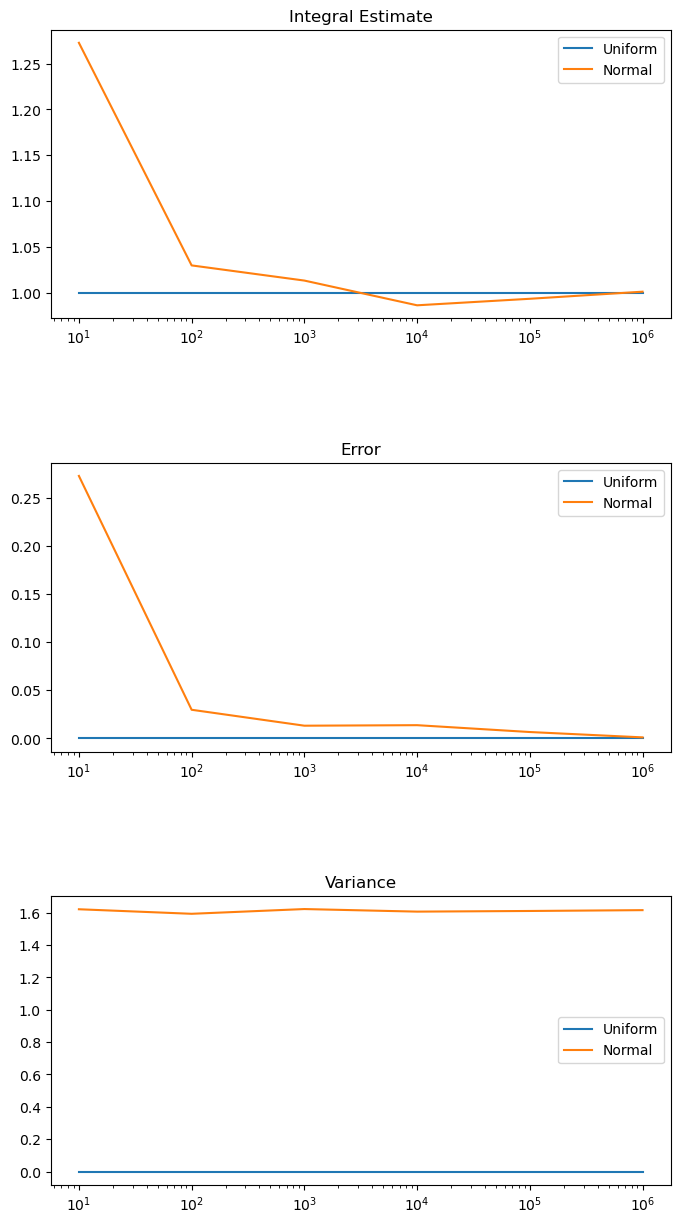

In [38]:
def w(x, a=0, b=1, mu=0.5, sigma=1):
    return (stats.uniform(a, b).pdf(x) /
            stats.norm(loc=mu, scale=sigma).pdf(x))
a = 0
b = 1
mu = 0.5
sigma = 1
est = []
error = []
variance = []
n_samples = []
for i in range(1, 7):
    n = int(10**i)
    
    # Uniform distribution
    X = stats.uniform(a, b).rvs(n)
    Y = (b - a) * f(X)
    est_un = np.mean(Y)
    error_un = np.abs(1 - est_un)
    var_un = np.var(Y)
    
    # Normal distribution
    X = stats.norm(loc=mu, scale=sigma).rvs(n)
    Y = (b - a) * w(X) * f(X)
    est_norm = np.mean(Y)
    error_norm = np.abs(1 - est_norm)
    var_norm = np.var(Y)
    
    est.append([est_un, est_norm])
    error.append([error_un, error_norm])
    variance.append([var_un, var_norm])
    
    n_samples.append(n)
    
est = np.array(est)
error = np.array(error)
variance = np.array(variance)
results = np.dstack([est, error, variance])

labels = ["Integral Estimate", "Error", "Variance"]
distributions = ["Uniform", "Normal"]
plt.figure(figsize=(8,15))
for i, lab in enumerate(labels):
    plt.subplot(3, 1, i + 1)
    for j, dist in enumerate(distributions):
        plt.plot(n_samples, results[:,j,i], label=dist)
        
    plt.xscale('log')
    plt.legend(loc='best')
    plt.title(lab)
    plt.subplots_adjust(hspace=0.5)
    
plt.show()
